# Importing the libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


# Importing the data

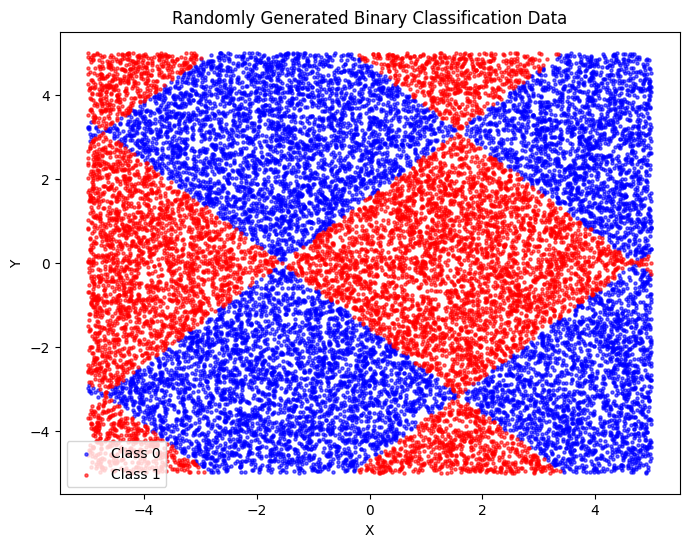

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate random data
def generate_random_data(n_samples=20000, seed=42):
    np.random.seed(seed)

    # Generate random x and y coordinates
    x = np.random.uniform(-5, 5, n_samples)
    y = np.random.uniform(-5, 5, n_samples)

    # Generate non-linear decision boundary for color assignment
    color = np.where(
        (np.sin(x) + np.cos(y)) > 0, 1, 0
    )  # Use a nonlinear rule to determine color (1 = Red, 0 = Blue)

    # Create a DataFrame
    data = pd.DataFrame({'x': x, 'y': y, 'color': color})
    return data

# Generate the data
data = generate_random_data()

# Save the data to a CSV (optional)
data.to_csv('random_data.csv', index=False)

# Visualize the data
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
for label in [0, 1]:
    subset = data[data['color'] == label]
    plt.scatter(subset['x'], subset['y'], c=colors[label], label=f'Class {label}', s=5, alpha=0.6)

plt.title('Randomly Generated Binary Classification Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [18]:
df = pd.read_csv('random_data.csv')

df.head()

,x,y,color
0,-1.254599,2.299983,0
1,4.507143,-3.154880,0
2,2.319939,-1.533603,1
3,0.986585,1.632806,1
4,-3.439814,-0.179107,1


# Splitting the data

In [19]:
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

# Constructing the input

In [22]:
x = np.column_stack((train.x.values, train.y.values))
y = train.color.values

In [21]:
print(x)
print(y)

[[-0.36063737 -4.86502729]
 [-3.37209011 -1.3713617 ]
 [ 1.09195391 -3.62109223]
 ...
 [-3.60549764 -3.04442989]
 [ 2.75527617 -2.21888753]
 [-2.89537783  1.46685727]]
[0 1 1 ... 0 0 0]


# Building a model

In [23]:
# Defining the model
model = keras.Sequential([
	keras.layers.Dense(4, input_shape=(2,), activation='relu'),
	keras.layers.Dense(2, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam',
			loss=keras.losses.SparseCategoricalCrossentropy(),
			metrics=['accuracy'])

# fitting the model
model.fit(x, y, epochs=10, batch_size=8)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5503 - loss: 0.8520
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6668 - loss: 0.6058
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7804 - loss: 0.5267
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8298 - loss: 0.4310
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8258 - loss: 0.4012
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8268 - loss: 0.3862
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8338 - loss: 0.3637
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8276 - loss: 0.3748
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8309 - loss: 0.3638
Epoch 10/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8362 - loss: 0.3558


In [24]:
# Evaluating the model
x = np.column_stack((test.x.values, test.y.values))
y = test.color.values
model.evaluate(x, y, batch_size=8)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8423 - loss: 0.3554


[0.3671126067638397, 0.8322499990463257]

# Building a better model

In [25]:
# Defining the model
model_better = keras.Sequential([
	keras.layers.Dense(16, input_shape=(2,), activation='relu'),
	keras.layers.Dense(32, activation='relu'),
	keras.layers.Dense(32, activation='relu'),
	keras.layers.Dense(2, activation='softmax')
])

# Compiling the model
model_better.compile(optimizer='adam',
					loss=keras.losses.SparseCategoricalCrossentropy(),
					metrics=['accuracy'])

# Constructing the input
x = np.column_stack((train.x.values, train.y.values))
y = train.color.values

# fitting the model
model_better.fit(x, y, epochs=10, batch_size=8)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7503 - loss: 0.4895
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9186 - loss: 0.1963
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9484 - loss: 0.1304
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9577 - loss: 0.1035
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9632 - loss: 0.0905
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9591 - loss: 0.0930
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9641 - loss: 0.0853
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9650 - loss: 0.0828
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9696 - loss: 0.0739
Epoch 10/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9693 - loss: 0.0747


In [26]:
# Evaluating the model
x = np.column_stack((test.x.values, test.y.values))
y = test.color.values
model.evaluate(x, y, batch_size=8)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8423 - loss: 0.3554


[0.3671126067638397, 0.8322499990463257]